# Calculating $\pi$

Learning goals:
* Scientific Programming
* Working with `numpy`
* Data visualization with `matplotlib`
* Profiling and bottlenecks


## 0. Introduction

In this notebook, we will learn how to calculate $\pi$ using [Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method).

We'll be simulating raindrops on a tile to determine the value of $\pi$. In a Monte Carlo simulation, we use random numbers within our simulation to try and understand some underlying relationship or phenomenon. Let's start discussing the problem:


## 0.1 The Setup

Let's imagine a flat square tile outside on a rainy day. For simplicity, let's call the width and length of the square to be 2. Now, let's say we draw a circle within the square such that the radius of the circle is 1 (i.e., its diameter is equal to 2, or the length of the square). The areas of the two shapes are:

$$ A_{square} = l \times w = 2 \times 2 = 4 $$
$$ A_{circle} = \pi r^2 = \pi (1)^2 = \pi $$

If we were to count the number of raindrops that fall in the square and in the circle, we can use the ratio of the two to estimate $\pi$:

$$ \frac{A_{circle}}{A_{square}} = \frac{\pi}{4}, $$

or

$$ \pi = 4 \times \frac{A_{circle}}{A_{square}}. $$

This holds true as the number of raindrops increases to infinity. In general, we can say:

$$ \pi \approx 4 \times \frac{A_{circle}}{A_{square}}. $$

We'll aim to reproduce the above equation using a Monte Carlo simulation.

Let's visualize the setup:


# 1. Visualizing the problem

We'll use `matplotlib` to visualize the problem.

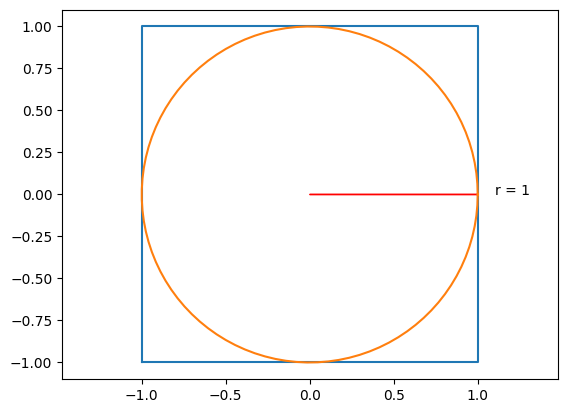

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_circle():
  ax = plt.subplot(111)
  # Coordinates of the square
  x = [-1, 1, 1, -1, -1]
  y = [-1, -1, 1, 1, -1]
  plt.plot(x, y)

  # Coordinates of the circle
  theta = np.linspace(0, 2*np.pi, 100)
  x_circle = np.cos(theta)
  y_circle = np.sin(theta)
  plt.plot(x_circle, y_circle)

  # Add an arrow indicating the radius
  plt.arrow(0, 0, 1, 0, fc='r', ec = "r")
  plt.text(1.1, 0, 'r = 1')
  plt.axis('equal')
  return ax


ax = plot_circle()


We want to count the number of raindrops that fall in the circle and the number that fall in the square.


# 2. Generating Random Numbers

We can generate random numbers using `numpy`. `numpy` has numerous methods for generating random numbers.

Typically, we'll want our random numbers to mimic some sort of underlying distribution. Let's look at a few of `numpy`'s built-in random number generators.


In [ ]:
import numpy as np

In [ ]:
n = 1000

# Generate n uniform random numbers between 0-5
a = np.random.uniform(0, 5, n)

# Generate n normal/gaussian distributed numbers with a mean of 5 and width of 1
mean = 5
std = 1
b = np.random.normal(mean, std, n)

# Generate n random integers between 1 and 100
c = np.random.randint(1, 100, n)

## 2.1 Let's Visualize the Randomness!

Let's use `matplotlib` to create a multi-panel plot.


Text(0.5, 1.0, 'Integer Distribution')

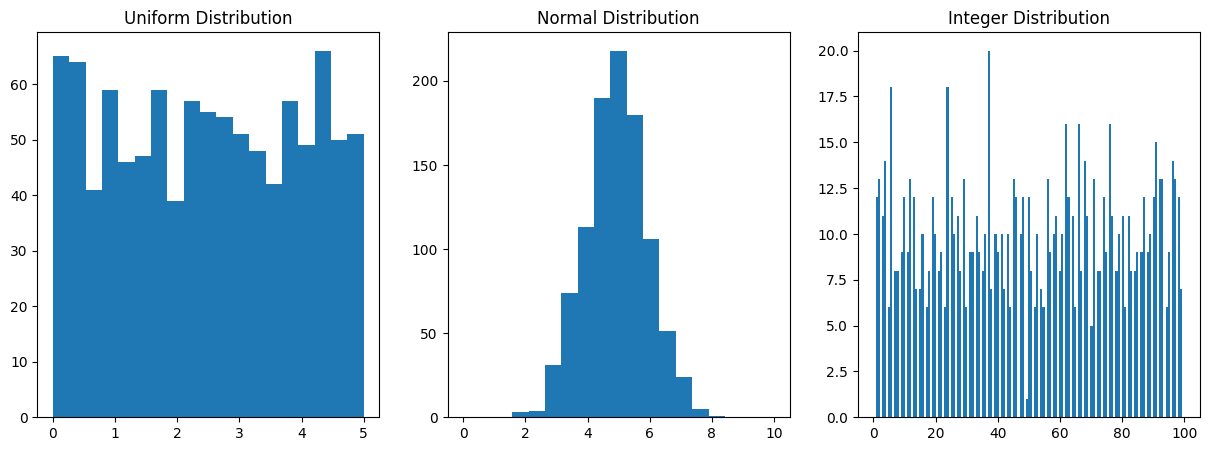

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.hist(a, bins=np.linspace(0,5,20))
ax1.set_title('Uniform Distribution')

ax2.hist(b, bins=np.linspace(0,10,20))
ax2.set_title('Normal Distribution')

ax3.hist(c, bins=np.linspace(0,100,150))
ax3.set_title('Integer Distribution')



## 2.2 Generate Random Numbers Following an Arbitrary Distribution

It's often the case that the distribution we want to simulate doesn't follow a predefined distribution. In these cases, we can still generate random numbers following that distribution using the [Cumulative Distribution Function (CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function).

Let's start off by looking at an arbitrary distribution:


In [ ]:
def my_relationship(x):
  return x**2 + 2*x + 1

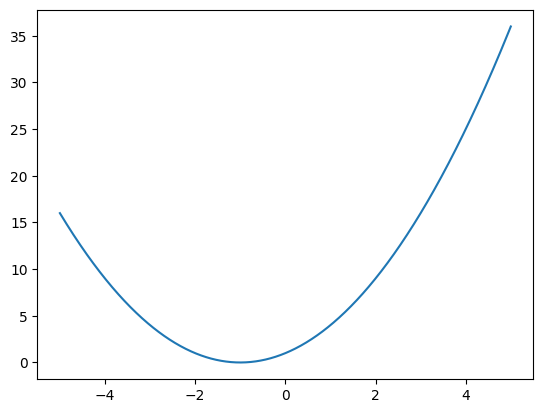

In [ ]:
x = np.linspace(-5, 5, 1000)
y = my_relationship(x)
plt.plot(x, y)

Let's write a function to get the cumulative distribution function of this dataset.


In [ ]:
def get_cdf(y):
  # Initialize to zero
  arr = np.zeros(len(y))
  # Loop over entries
  arr[0] = y[0]
  for i in range(len(y)-1):
    arr[i+1] = y[i+1] + arr[i]
  return arr/arr[-1]

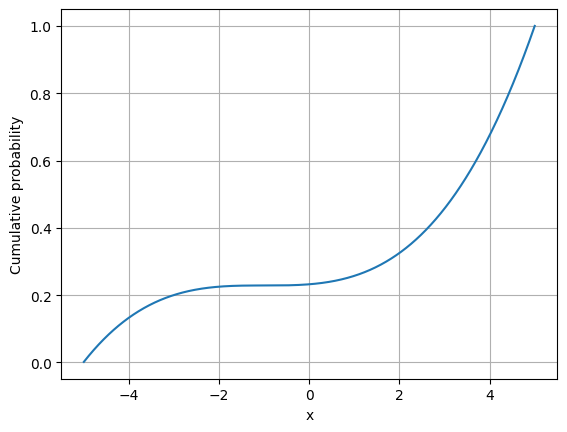

In [ ]:
# Plot the cdf
y_cdf = get_cdf(y)  # Get the cumulative distribution function of y
plt.plot(x, y_cdf)  # Plot the CDF against x values
plt.ylabel('Cumulative probability')  # Label for the y-axis
plt.xlabel('x')  # Label for the x-axis
plt.grid()  # Add grid for better visualization
plt.show()  # Display the plot

We can use [interpolation](https://en.wikipedia.org/wiki/Interpolation) to find the value of this curve at any point. In particular, we want a way to go from the cumulative distribution function (CDF) to the actual distribution.

We'll use `scipy` and the function [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) for this purpose.


In [ ]:
from scipy.interpolate import interp1d

# We want to provide a number between 0-1 and return the value of x (-5,5) corresponding to that
# Make sure the boundries are set so that we don't get out of range errors
interpolation = interp1d(y_cdf, x, bounds_error=False, fill_value=(x[0], x[-1]))

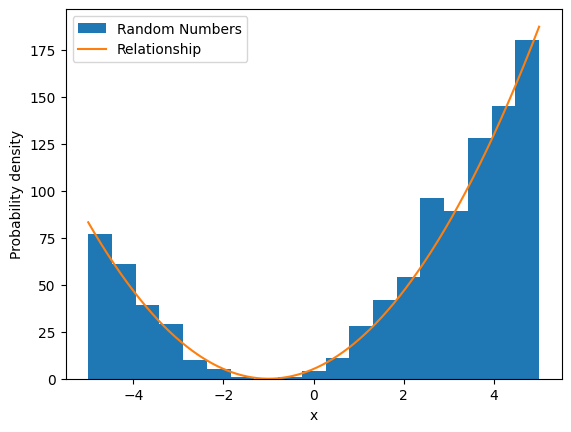

In [ ]:
# Generate Random Numbers
rnd_numbers = np.random.uniform(0, 1, 1000)
rnd_x = interpolation(rnd_numbers)


# Get the plot normalization
# Normalizing the relationship curve to have equal area under the curve
norm_rnd = np.sum(rnd_x)
norm_relationship = np.sum(y)
norm = norm_relationship / norm_rnd


plt.hist(rnd_x, bins=np.linspace(-5,5,20), label = "Random Numbers")
plt.plot(x, norm*y, label = "Relationship")
plt.ylabel('Probability density')
plt.xlabel('x')
plt.legend();

# 3. Getting back to $\pi$

Now that we know how to generate random numbers, how might we use this to calculate $\pi$?

Hint:
* Let's assume that the rain falling can be modeled using a Uniform distribution

In [ ]:
n = 1000

# Get random x and y coordinates for the rain drops
rain_drops_x = np.random.uniform(-1, 1, n)
rain_drops_y = np.random.uniform(-1, 1, n)


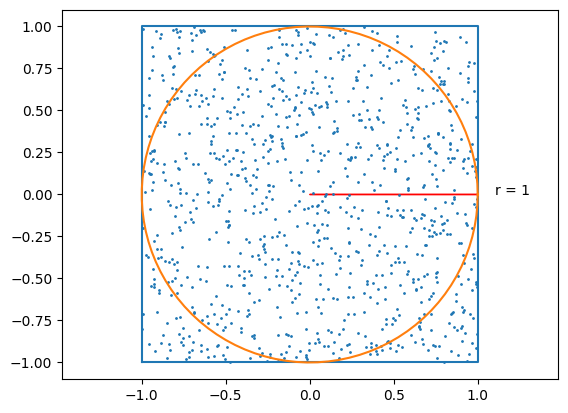

In [ ]:
ax = plot_circle()
ax.scatter(rain_drops_x, rain_drops_y, s=1)

This is good, we have the random rain drops. How can we count the number of raindrops within the circle and outside of the circle?

The equation of a circle is:
$$ r^2 = x^2 + y^2 $$

So for our circle of radius 1, the outter edge is defined as:
$$ x^2 + y^2 = 1$$


In [ ]:
counter_in = 0

for i in range(n):
  # Recall the equation of a circle!
  if rain_drops_x[i]**2 + rain_drops_y[i]**2 < 1:
    counter_in += 1

print(counter_in)

793


Using what we derived before, let's estimate $\pi$

In [ ]:
pi_estimate = 4 * counter_in / n
print(pi_estimate)

3.172


This is relatively close, but we wouldn't want to rely on this number to land on the Moon!

How can we increase the accuracy? Recall that
$$ \pi \approx 4 \times \frac{A_{circle}}{A_{square}},$$

Is only an approximate. As the number of rain drops tends to infinity, then
$$ \pi = 4 \times \frac{A_{circle}}{A_{square}}.$$

So to increase the accuracy, we need to increase the number of rain drops!

## 3.1 Getting an accurate result

We can start by increasing the number of rain drops. Let's look at how long it takes to run the simulation for different numbers of rain drops. To do this we'll use the `time` module and some "python magic"


In [ ]:
import time

In [ ]:
# Let's function-ize our random number generator
def get_rain_drops(n):
  rain_drops_x = np.random.uniform(-1, 1, n)
  rain_drops_y = np.random.uniform(-1, 1, n)
  return rain_drops_x, rain_drops_y

In [ ]:
n_samples = np.array([100, 1000, 10000, 100000, 1000000])
pi_values = np.zeros(len(n_samples))
time_values = np.zeros(len(n_samples))

for j, n in enumerate(n_samples):
  start = time.time()
  rain_drops_x, rain_drops_y = get_rain_drops(n)
  counter_in = 0
  for i in range(n):
    if rain_drops_x[i]**2 + rain_drops_y[i]**2 < 1:
      counter_in += 1
  pi_values[j] = (4*counter_in/n)
  time_values[j]= (time.time() - start)
  print(n, pi_values[j], time_values[j])


100 2.92 0.00023937225341796875
1000 3.172 0.0016646385192871094
10000 3.1548 0.010968208312988281
100000 3.14744 0.08640599250793457
1000000 3.142572 0.8315095901489258


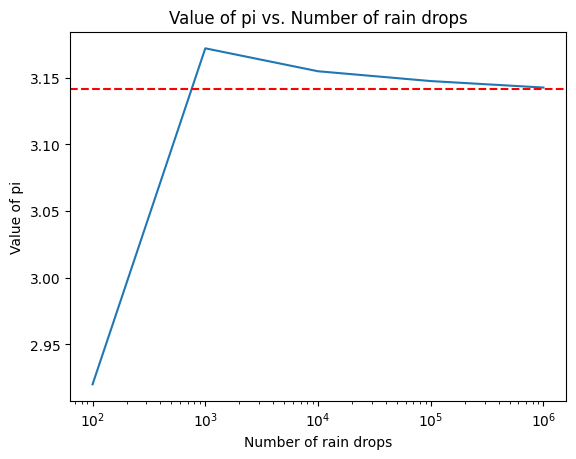

In [ ]:
plt.plot(n_samples, pi_values)
plt.axhline(np.pi, color='r', linestyle='--', label='Actual value of pi')
plt.title('Value of pi vs. Number of rain drops')
plt.xlabel('Number of rain drops')
plt.ylabel('Value of pi')
plt.xscale('log')

From this it looks like we have an accurate value after $10^5$ rain drops. However is this true? Let's look instead at how far away from the true value we are.

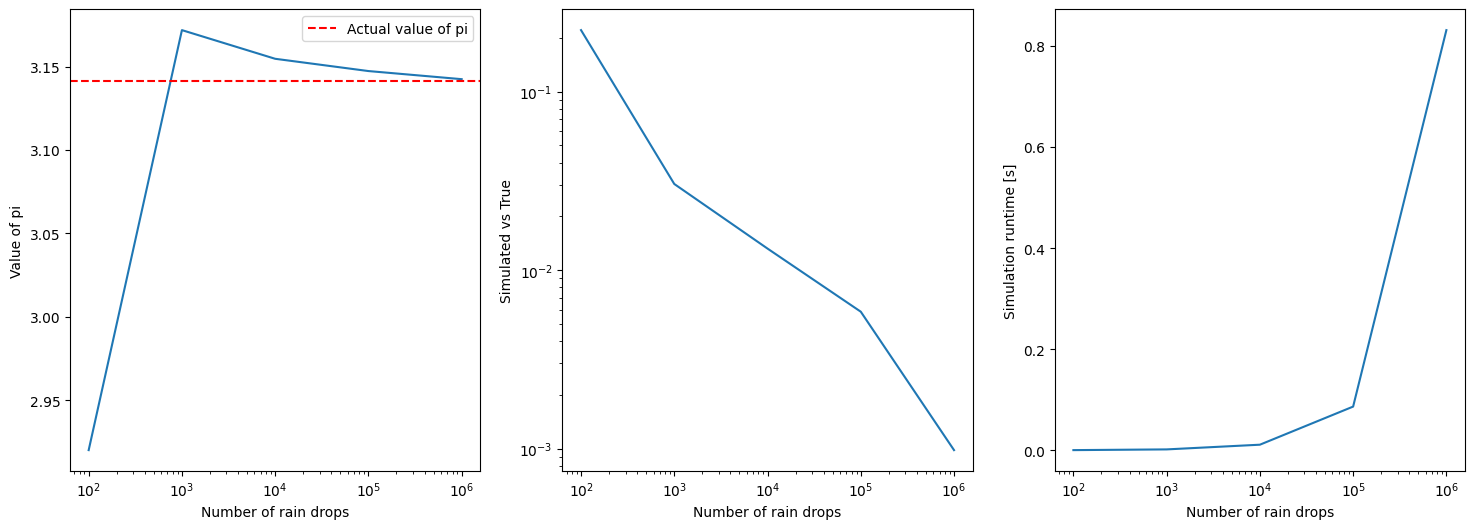

In [ ]:
# multi plot of value of pi, accuracy and run time
fig, ax = plt.subplots(1,3, figsize = (18,6))
ax[0].plot(n_samples, pi_values)
ax[0].set_xlabel('Number of rain drops')
ax[0].set_ylabel('Value of pi')
ax[0].set_xscale('log')
ax[0].axhline(np.pi, color='r', linestyle='--', label='Actual value of pi')
ax[0].legend()


ax[1].plot(n_samples, np.abs(pi_values - np.pi))
ax[1].set_xlabel('Number of rain drops')
ax[1].set_ylabel('Simulated vs True')
ax[1].set_xscale('log')
ax[1].set_yscale('log')



ax[2].plot(n_samples, time_values)
ax[2].set_xlabel('Number of rain drops')
ax[2].set_ylabel('Simulation runtime [s]')
ax[2].set_xscale('log')


From the above plot we can say that with $10^5$ rain drops we are accurate to the 2-3 decimal place. However moving to $10^6$ samples increases the runtime.

This might be a good time to look at the performance of our simulation.

# 4. Performance and Benchmarking

When we're trying to improve our code it's important to set metrics that we want to improve on. Such metrics might be:

* The overall runtime
* The resource usage (e.g. memory, CPU)
* The accuracy of the results

In reality improving one of the above might worsen the others. For example, we've already looked at the accuracy of the result. To improve the accuracy we needed to increase the number of rain drops. This means that we need to increase the runtime, but also to increase the memory requirements (as we've need to store more random numbers!).

Optimizing our code is often a balancing act between competing interests.

In this section we'll look at ways to examine the performance of our function.

In [ ]:
# Start of by further functionizing our monte carlo simulation
def calculate_pi_v0(n):
  rain_drops_x, rain_drops_y = get_rain_drops(n)
  counter_in = 0
  for i in range(n):
    if rain_drops_x[i]**2 + rain_drops_y[i]**2 < 1:
      counter_in += 1
  return (4*counter_in/n)




In [ ]:
calculate_pi_v0(10000)

3.1536

Let's import `timeit`. This library allows us to time processes in python.
It does some things behind the scenes such as pausing processes that might effect the estimation of the run time.

We can use "magic" to time our function:
* `%timeit` will time a single line of code
* `%%timeit` will time the whole cell
* The `timeit.repeat` function will give us a little more control over what happens and allow us to save the results to a variable.

In [ ]:
import timeit

In [ ]:
# Get the benchmark time before we change the code
# We'll run the code 10 times without pausing, repeating the experiment 20 times
n_run = 10
n_repeat = 20
n_drops = 10000
results_0 = timeit.repeat(f"calculate_pi_v0({n_drops})", "from __main__ import calculate_pi_v0",
                  number=n_run, repeat=n_repeat)
print (f"Baseline: {np.mean(results_0):0.4f} +/- {np.std(results_0):0.4f} seconds")

Baseline: 0.1024 +/- 0.0325 seconds


## 4.1 Line Profiling

Now that we have an idea of the runtime let's see where in the code most of the time is spent.

Line profiling allows us to estimate the runtime of each line of code. This helps identify bottlenecks and where to focus our efforts when optimizing our code.

For this we'll use `line_profiler` but there are others:
* [Line Profiler](https://kernprof.readthedocs.io/en/latest/)
* [PProfile](https://github.com/vpelletier/pprofile)
* [CProfile](https://www.turing.com/kb/python-code-with-cprofile)

As well as some awesome visulaiztion tools:
* [Snakeviz](https://jiffyclub.github.io/snakeviz/)
* [Flamegraph](https://github.com/brendangregg/FlameGraph)

In [ ]:
!pip install line_profiler
%load_ext line_profiler


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.6/717.6 kB 12.4 MB/s eta 0:00:00


In [ ]:
lprun -f calculate_pi_v0 calculate_pi_v0(n_drops)

We should see something like:

```
Timer unit: 1e-09 s

Total time: 0.0634801 s
File: <ipython-input-114-aee2509612d0>
Function: calculate_pi at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     2                                           def calculate_pi(n):
     3         1    3837332.0    4e+06      6.0    rain_drops_x, rain_drops_y = get_rain_drops(n)
     4         1        677.0    677.0      0.0    counter_in = 0
     5     10001    6192577.0    619.2      9.8    for i in range(n):
     6     10000   46764473.0   4676.4     73.7      if rain_drops_x[i]**2 + rain_drops_y[i]**2 < 1:
     7      7846    6681865.0    851.6     10.5        counter_in += 1
     8         1       3146.0   3146.0      0.0    return (4*counter_in/n)
```

This shows line-by-line where we're spending the most of our time

Looking at the `Time` column we can see that generating the random numbers takes up a large portion of the time. However this only happens once, only taking up ~6% of the time (as shown in the `Hits` and `% Time` columns).

If we focus on the `% Time` column, we can see that the majority of our time is spent checking if the rain drops are within the circle:

```
     6     10000   46764473.0   4676.4     73.7      if rain_drops_x[i]**2 + rain_drops_y[i]**2 < 1:
```

In this case we spend ~70% or our time on this line. We also spend ~10% of our time in the for loop:
```
     5     10001    6192577.0    619.2      9.8    for i in range(n):
```

And another ~10% of our time counting the number of rain drops:
```
     7      7846    6681865.0    851.6     10.5        counter_in += 1
```

Can we combine these three lines to improve the code?

## 4.1 Removing the for loop

We can remove the for loop using `numpy` array's masking.
Let's look at the following:

In [ ]:
# Generate some random numbers
x = np.random.uniform(-1, 1, 10)
print (x)
# Get a mask (True/False) where x > 0
mask = x > 0
print(mask)

# Recall that when converting to ints True = 1 and False = 0
print(mask*1)

# We can get the sum of numpy arrays using either np.sum or
print (mask.sum())

[ 0.72171476 -0.50958269 -0.04502572  0.03438927  0.21523572 -0.21264337
 -0.36754284 -0.54510252 -0.764482   -0.64749491]
[ True False False  True  True False False False False False]
[1 0 0 1 1 0 0 0 0 0]
3


With this in mind, let's remove the for loop:

In [ ]:
def calculate_pi_v1(n):
  rain_drops_x, rain_drops_y = get_rain_drops(n)
  counter_in = 0
  counter_in = (rain_drops_x**2 + rain_drops_y**2 < 1).sum()
  return (4*counter_in/n)



In [ ]:
calculate_pi_v1(1000)

3.188

In [ ]:
results_1 = timeit.repeat(f"calculate_pi_v1({n_drops})", "from __main__ import calculate_pi_v1",
                  number=n_run, repeat=n_repeat)
print (f"Baseline: {np.mean(results_0):0.4f} +/- {np.std(results_0):0.4f} seconds")
print (f"V1: {np.mean(results_1):0.4f} +/- {np.std(results_1):0.4f} seconds -> Speedup: {np.mean(results_0)/np.mean(results_1):0.4f}")


Baseline: 0.0647 +/- 0.0041 seconds
V1: 0.0029 +/- 0.0010 seconds -> Speedup: 22.5632


Let's profile the function again:

In [ ]:
lprun -f calculate_pi_v1 calculate_pi_v1(n_drops)

Which gives something like:
```
Timer unit: 1e-09 s

Total time: 0.00172171 s
File: <ipython-input-147-23550d2cf014>
Function: calculate_pi_v1 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def calculate_pi_v1(n):
     2         1    1565852.0    2e+06     90.9    rain_drops_x, rain_drops_y = get_rain_drops(n)
     3         1       1046.0   1046.0      0.1    counter_in = 0
     4         1     150971.0 150971.0      8.8    counter_in = (rain_drops_x**2 + rain_drops_y**2 < 1).sum()
     5         1       3844.0   3844.0      0.2    return (4*counter_in/n)
```

We've removed the expensive for loop, instead we're now relying on `numpy`'s highly optimized operations to loop over the array and get the sum.

We're now spending 90% of our time in the `get_rain_drops` function. Let's take a look that in some more detail. We can use `%timeit` to estimate the runtime:


In [ ]:
%timeit get_rain_drops(n_drops)

214 µs ± 5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
lprun -f get_rain_drops get_rain_drops(n_drops)

```
Timer unit: 1e-09 s

Total time: 0.00286489 s
File: <ipython-input-16-cd75bad8bfb6>
Function: get_rain_drops at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     2                                           def get_rain_drops(n):
     3         1     508631.0 508631.0     17.8    rain_drops_x = np.random.uniform(-1, 1, n)
     4         1    2355321.0    2e+06     82.2    rain_drops_y = np.random.uniform(-1, 1, n)
     5         1        938.0    938.0      0.0    return rain_drops_x, rain_drops_y
```

We're still spending a lot of time generating random numbers. Can we speed this up using some more advanced methods?



## 4.2 Pre-compiling our code with Numba

We can use `numba` to "compile" the code. When compiling the code numba will perform some optimization and remove the step of converting the python script to machine code. This is done using the `@jit` decorator.

`jit` stands for "just-in-time" compiling. This means that the first time this function is called, it will be compiled. So the first time it runs, it will take longer than usual, but after that, the runtime should be improved:

In [ ]:
from numba import jit, prange
import random


# Let's functionize our random number generator
@jit(parallel=True, nogil=True, nopython=True)
def get_rain_drops_v2(n):
  x, y = np.empty(n), np.empty(n)
  for i in prange(n):
     x[i] = random.uniform(0,1)
     y[i] = random.uniform(0,1)
  return x,y

# A quick run so that the code compiles before we test it
get_rain_drops_v2(1)

(array([0.19351567]), array([0.68520083]))

In [ ]:
%timeit get_rain_drops_v2(n_drops)

169 µs ± 51.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


This offers some improvement over the original `get_rain_drops` functions. Let's see how this impacts our monte carlo simulation:

In [ ]:
def calculate_pi_v2(n):
  rain_drops_x, rain_drops_y = get_rain_drops_v2(n)
  counter_in = 0
  counter_in = (rain_drops_x**2 + rain_drops_y**2 < 1).sum()
  return (4*counter_in/n)


In [ ]:
results_2 = timeit.repeat(f"calculate_pi_v2({n_drops})", "from __main__ import calculate_pi_v2",
                  number=n_run, repeat=n_repeat)
print (f"Baseline: {np.mean(results_0):0.4f} +/- {np.std(results_0):0.4f} seconds")
print (f"V1: {np.mean(results_1):0.4f} +/- {np.std(results_1):0.4f} seconds -> Speedup: {np.mean(results_0)/np.mean(results_1):0.4f}")
print (f"V2: {np.mean(results_2):0.4f} +/- {np.std(results_2):0.4f} seconds -> Speedup: {np.mean(results_0)/np.mean(results_2):0.4f}")

Baseline: 0.0647 +/- 0.0041 seconds
V1: 0.0029 +/- 0.0010 seconds -> Speedup: 22.5632
V2: 0.0024 +/- 0.0006 seconds -> Speedup: 27.4095


This seems to offer an improvement to the code, but there area still some fluctuations in the run speed. We likely near the limit of what we can measure with 5 runs, repeated 20 times.



In [ ]:
@jit(parallel=True, nogil=True, nopython=True)
def calculate_pi_v3(n):
  rain_drops_x, rain_drops_y = get_rain_drops_v2(n)
  return (4*(rain_drops_x**2 + rain_drops_y**2 < 1).sum()/n)

In [ ]:
#pre-run to compile the code
calculate_pi_v3(n_drops)

3.1172

In [ ]:
results_3 = timeit.repeat(f"calculate_pi_v3({n_drops})", "from __main__ import calculate_pi_v3",
                  number=n_run, repeat=n_repeat)
print (f"Baseline: {np.mean(results_0):0.4f} +/- {np.std(results_0):0.4f} seconds")
print (f"V1: {np.mean(results_1):0.4f} +/- {np.std(results_1):0.4f} seconds -> Speedup: {np.mean(results_0)/np.mean(results_1):0.4f}")
print (f"V2: {np.mean(results_2):0.4f} +/- {np.std(results_2):0.4f} seconds -> Speedup: {np.mean(results_0)/np.mean(results_2):0.4f}")
print (f"V3: {np.mean(results_3):0.4f} +/- {np.std(results_3):0.4f} seconds -> Speedup: {np.mean(results_0)/np.mean(results_3):0.4f}")

Baseline: 0.0647 +/- 0.0041 seconds
V1: 0.0029 +/- 0.0010 seconds -> Speedup: 22.5632
V2: 0.0024 +/- 0.0006 seconds -> Speedup: 27.4095
V3: 0.0019 +/- 0.0016 seconds -> Speedup: 33.4014


# 5. Creating an nice visualization

Now that we have well-performing code, let's wrap everything together to make a nice visualization to communicate our findings.

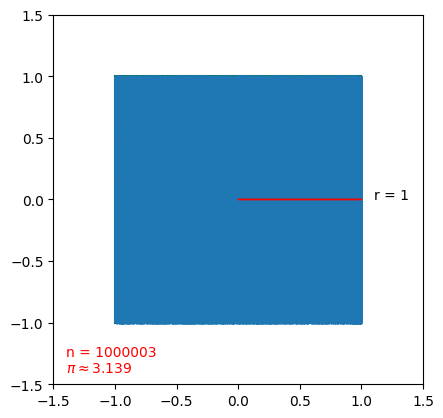

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

# Set up raindrop parameters
x, y = np.array([]), np.array([])
n_drops = np.logspace(0, 6, 100).astype(int)
n_drops[1:] -= n_drops[:-1]

# Create plot figure
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Draw circle to represent the unit circle
circle = plt.Circle((0, 0), 1, color='blue', alpha=0.2)
ax.add_artist(circle)

# Draw square from (-1, -1) to (1, 1)
square = plt.Rectangle((-1, -1), 2, 2, edgecolor='green', facecolor='none', linewidth=1.5)
ax.add_artist(square)

# Initialize scatter plot and text
scatter = ax.scatter([], [], s=0.1)
text = ax.text(-1.4, -1.4, "", color="red")

ax.arrow(0, 0, 1, 0, fc='r', ec = "r")
ax.text(1.1, 0, 'r = 1')

# Function to update the plot with each batch of raindrops
def update(i):
    global x, y

    # Add a new batch of raindrops
    x = np.append(x, np.random.uniform(-1, 1, int(n_drops[i])))
    y = np.append(y, np.random.uniform(-1, 1, int(n_drops[i])))

    # Calculate estimated Pi
    pi_estimate = 4 * (x**2 + y**2 < 1).sum() / len(x)

    # Update scatter plot data and Pi text
    scatter.set_offsets(np.c_[x, y])
    text.set_text(f"n = {len(x)}\n" + r"$\pi \approx$" + f"{pi_estimate:.3f}")

    return scatter, text

# Create animation
anim = FuncAnimation(fig, update, frames=len(n_drops), blit=True)

# Save animation as GIF
anim.save("raindrops_pi_estimate.gif", writer=PillowWriter(fps=2))



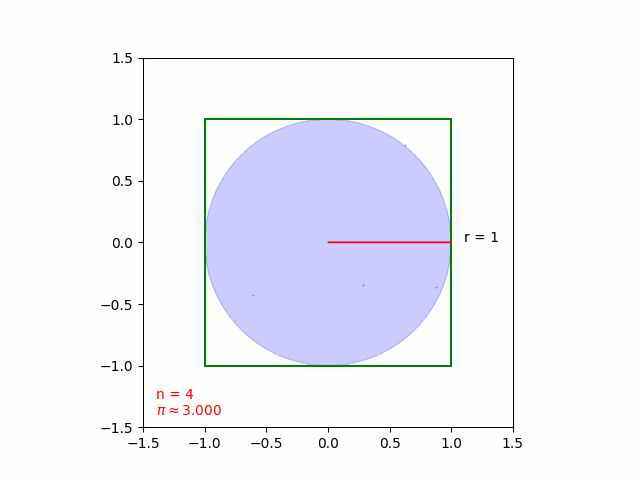

In [ ]:
from IPython.display import Image
Image('raindrops_pi_estimate.gif')